#### Lab 5 Report

Author names go here 

Michael Lee, David Yu, Wengjie Ma

(This should be a markup cell, which means that when you run it you just get formated text.)

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 
import decimal
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
from scipy import signal

Assignment 1 - Convolving Signals

<IPython.core.display.Javascript object>


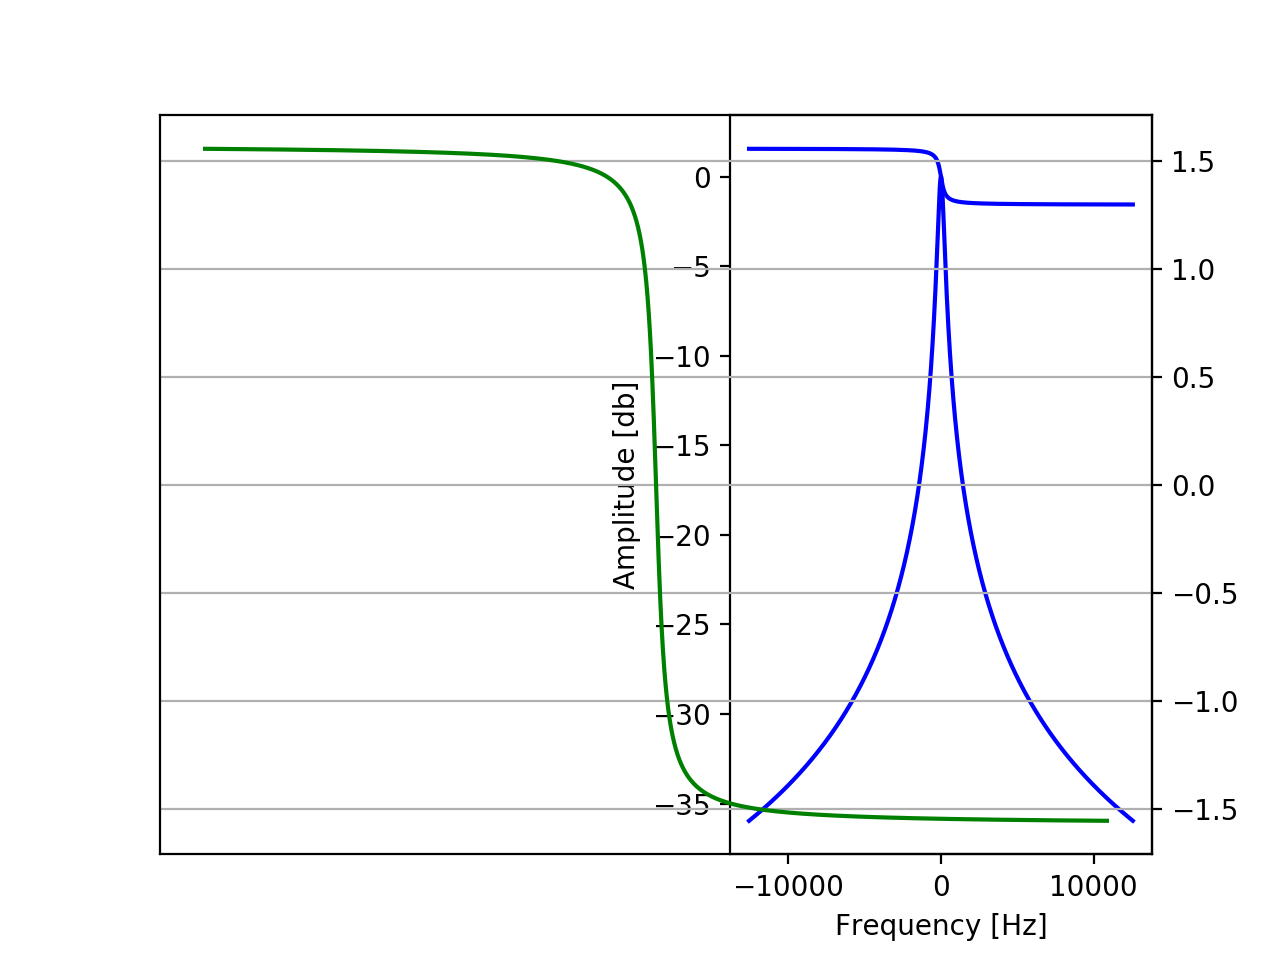

/Users/JackMa/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-13822.8542777163, 13819.78631614053, -1.7103663138427048, 1.7103701994258316)

In [38]:
# A
# fs = 8000
# t = np.arange(0,0.25,1/fs)
# d0 = np.sin(2*np.pi*981*t) + np.sin(2*np.pi*1336*t)

# # B
# d02 = 2000*np.concatenate([d0, np.zeros(int(0.5*fs)), d0])

# play_obj = sa.play_buffer(d02.astype('int16'),1,2,fs)
# play_obj.wait_done()

# # C
# N = 4096
# d0_ft = np.abs(np.fft.fft(d0,N))
# d0_fts = np.fft.fftshift(d0_ft)
# f = np.arange(int(-fs/2),int(fs/2),fs/N)

# fig = plt.figure(1)
# fig.subplots_adjust(hspace = 1, wspace = 0.35)

# plt.subplot(2,1,1)
# plt.plot(f,d0_fts)

# # D
# # a 
# ind = np.arange(len(d0_fts))
# b = ind[d0_fts[ind]>900]
# # b
# for t in b:
#     if (t > 0):
#         print(t)
        
# # E
# n = np.random.normal(0,1,len(d0))
# d0n = d0 + n
# d0n_ft = np.abs(np.fft.fft(d0n, N))
# d0n_fts = np.fft.fftshift(d0n_ft)

# plt.subplot(2,1,2)
# plt.plot(f,d0n_fts)
fs = 4000
t = np.arange(0,0.5,1/fs)
x1 = np.cos(100*t)
nfft = 8192

b = [200]
a = [1, 200]
sys = [b,a]

f = np.arange(-nfft/2,nfft/2,1)*fs/nfft
w = f*2*np.pi
w2,h_f = signal.freqresp(sys,w)

fig = plt.figure(6)
fig.subplots_adjust(hspace = 1, wspace = 0.35)
plt.title('Frequnecy filter response', color = 'black')

ax1 = fig.add_subplot(111)
plt.subplot(1,2,2)
plt.plot(w, np.angle(h_f), 'b')
plt.plot(w, 20 * np.log10(abs(h_f)), 'b')
plt.ylabel("Amplitude [db]", color = 'black')
plt.xlabel("Frequency [Hz]", color = 'black')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_f))
plt.plot(w, angles, 'g')
plt.xlim(-500,500)
plt.grid()
plt.axis('tight')

#part 2
fs1 = 4000
t = np.arange(0, 0.5, 1/fs)
u = np.heaviside(t,1)
x1t = 50 * t * np.exp(-15*t) * u
x0t = -1 * x1t
x2t = np.cos(200*t)
xm = np.concatenate(x1t, x0t, 1)

fig2 = plt.figure(7)
plt.xlim(-100,100)



Discussion

There would be more frequencies if the threshold was 100. If the threshold is lower, then there are more possibilities to choose from. When you get near a big frequency, there are still smaller frequencies that appear, and 100 doesn't hide these smaller frequencies. Even though they are small compared to the big one, they are significant enough to show up.
The addition of noise makes the small frequencies that aren't the main frequencies bigger. Ideally, they should be 0, but in reality they are small. Adding nosie makes them bigger. 
If there was an extra +1, the FFT would have a large frequency at 0.

Assignment 2

In [3]:
# Assignment 2
# A

def classify(x, fs):
    # a
    tone_freqs = [[941,697,697,697,770,770,770,852,852,852],[1336,1209,1336,1477,1209,1336,1477,1209,1336,1477]]
    # b
    N = 4096
    threshold = 900
    xfft_abs = np.fft.fftshift(np.abs(np.fft.fft(x,N)))
    ind = np.arange(len(xfft_abs))
    index_tone = ind[xfft_abs>900]
    
    
    f = np.arange(int(-fs/2),int(fs/2),fs/N)
    freq_tone = f[index_tone]
    pos_freq = [0,0]
    
    index = 0
    for row in freq_tone:
        if row > 0:
            pos_freq[index] = row
            index += 1
                
    # c
    digit_error = 0
    min_e = 10000
#     min_e_tone = ''
    min_e_tone = 0;
    for i in np.arange(0,10):
        error = (tone_freqs[0][i] - pos_freq[0])**2+(tone_freqs[1][i] - pos_freq[1])**2
        digit_error += error
        if error < min_e:
            min_e = error
#             min_e_tone = '' + str(i)
            min_e_tone = i
    return min_e_tone

In [4]:
# B
fs = 8000
t = np.arange(0,0.25,1/fs)
d4 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1209*t)
d5 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1336*t)
d8 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1336*t)
d9 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1477*t)

print(classify(d4,fs))
print(classify(d5,fs))
print(classify(d8,fs))
print(classify(d9,fs))

4
5
8
9


/Users/JackMa/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


Discussion
 
To ensure high detection accuracy, us a high threshold when you use the maskin strategy so the lower spikes are filtered out. While there are more spikes, they are still relatively small compared to the main frequencies found using the fft. So use a big enough threshold that filters out the noise, but doesn't filter out the main frequencies.

Assignment 3

In [7]:
# Assignment 3

# A
fs = 8000

file = open('phonenum.csv', 'rb')
rm = np.loadtxt(file,delimiter=',')

# B
phone_num = -np.ones(12)

# C
for num in np.arange(0,12):
    element = rm[int(i*fs/2):int(i*fs/2+0.25)]
    phone_num[num] = classify(element,fs)
    
print(phone_num)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/Users/JackMa/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


Discussion

